# Predicting Car Prices

I use k-nearest neighbors models to predict the price of a car based on various numerical attributes of the vehicle.I used the [1985 Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile) which can be accessed on the UCI Machine Learning Repository. The data set contains information on various attributes for 205 vehicles.


In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# read in data

cols = cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
               'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
               'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
               'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars_df = pd.read_csv('imports-85.data', names=cols)
print(cars_df.head())
print(cars_df.info())


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-rate hors

In [3]:
# clean the data

# keep only numeric columns
numeric_cols = ['symboling', 'num-of-doors', 'wheel-base', 'length', 'width', 'height','curb-weight',
                'num-of-cylinders', 'engine-size', 'compression-rate', 'city-mpg', 'highway-mpg',
                'price']
numeric_cars_df = cars_df[numeric_cols]

# replace ?s with nulls
numeric_cars_df.replace('?', np.nan, inplace=True)
print(numeric_cars_df.isnull().sum())
print(numeric_cars_df.isnull().any(axis=1).sum())

# only 6 rows with missing values in numeric cols - remove these rows
numeric_cars_df = numeric_cars_df.dropna()
print(len(numeric_cars_df))

# convert string cols to numeric
num_str_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
for col in ['num-of-doors', 'num-of-cylinders']:
#     print(col)
#     print(cars_df[col].unique())
    numeric_cars_df[col] = numeric_cars_df[col].map(num_str_dict)

numeric_cars_df = numeric_cars_df.astype(float)
print(numeric_cars_df.info())

# normalize the possible feature columns
normalized_cars_df = (numeric_cars_df - numeric_cars_df.mean()) / numeric_cars_df.std()
normalized_cars_df['price'] = numeric_cars_df['price']
print(normalized_cars_df.info())


symboling           0
num-of-doors        2
wheel-base          0
length              0
width               0
height              0
curb-weight         0
num-of-cylinders    0
engine-size         0
compression-rate    0
city-mpg            0
highway-mpg         0
price               4
dtype: int64
6
199
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         199 non-null    float64
 1   num-of-doors      199 non-null    float64
 2   wheel-base        199 non-null    float64
 3   length            199 non-null    float64
 4   width             199 non-null    float64
 5   height            199 non-null    float64
 6   curb-weight       199 non-null    float64
 7   num-of-cylinders  199 non-null    float64
 8   engine-size       199 non-null    float64
 9   compression-rate  199 non-null    float64
 10  city-mpg          199

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [4]:
# create a simple train/test validation model

def knn_train_test(df, feature_cols, target_col, k):
    # randomize the data set
    np.random.seed(1)
    randomized_df = df.reindex(np.random.permutation(df.index))

    # split into test and train data sets
    test_df = randomized_df[:round(len(randomized_df) * 0.75)]
    train_df = randomized_df[~randomized_df.index.isin(test_df.index)]
#     print(len(randomized_df))
#     print(len(test_df))
#     print(len(train_df))

    # build the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[feature_cols], train_df[target_col])
    
    # run the model
    predictions = knn.predict(test_df[feature_cols])
    
    # get the error
    rmse = mean_squared_error(test_df[target_col], predictions) ** 0.5

    return rmse


## Univariate model
A univariate model using k = 1 and engine size as the predictor yields the lowest error using this model with this train and test sets.

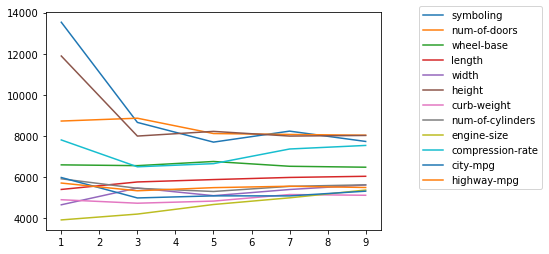

[(3915.731051941762, 'engine-size', 1), (4199.849702488165, 'engine-size', 3), (4652.090370154103, 'width', 1), (4665.74591856911, 'engine-size', 5), (4728.807913877817, 'curb-weight', 3), (4831.629670989271, 'curb-weight', 5), (4898.544609227378, 'curb-weight', 1), (4984.684348076888, 'city-mpg', 3), (4990.590741696075, 'engine-size', 7), (5084.456787706158, 'city-mpg', 7), (5086.956520066491, 'city-mpg', 5), (5095.831844101187, 'width', 5), (5115.326583870962, 'curb-weight', 9), (5151.100433573064, 'curb-weight', 7), (5299.535501438471, 'num-of-cylinders', 5), (5314.4834584629125, 'city-mpg', 9), (5334.105615436329, 'highway-mpg', 3), (5370.5017950481715, 'engine-size', 9), (5396.024498185284, 'width', 7), (5398.449408870498, 'length', 1), (5454.237843288085, 'num-of-cylinders', 3), (5468.394174924572, 'width', 3), (5486.285956526375, 'highway-mpg', 5), (5493.792999158877, 'highway-mpg', 9), (5549.19123867338, 'num-of-cylinders', 7), (5555.072664231292, 'highway-mpg', 7), (5616.35437

In [5]:
# test different univariate models using different ks

rmse_dict = {}
rmse_tuple_list = []
k_list = [1, 3, 5, 7, 9]
for col in normalized_cars_df.columns:
    col_rmse_list = []
    if col != 'price':
        for k in k_list:
#             print('Predictor: {c}   K: {n}'.format(c=col, n=k))
            k_rmse = knn_train_test(normalized_cars_df, [col], 'price', k)
#             print('   RMSE: {r}'.format(r=k_rmse))
            col_rmse_list.append(k_rmse)
            rmse_tuple_list.append((k_rmse, col, k))
        
        rmse_dict[col] = col_rmse_list

# plot the rmses
for key, val in rmse_dict.items():
    plt.plot(k_list, rmse_dict[key], label=key)
#     plt.scatter(k_list, rmse_dict[key], label=key)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# print the rmses from smallest to largest
print(sorted(rmse_tuple_list))


## Multivariate model
A multivariate model using k = 1 and engine-size, width, curb-weight, and city-mpg as the predictors yields the lowest error using this model with this train and test sets. But the univariate model still yields a lower error.

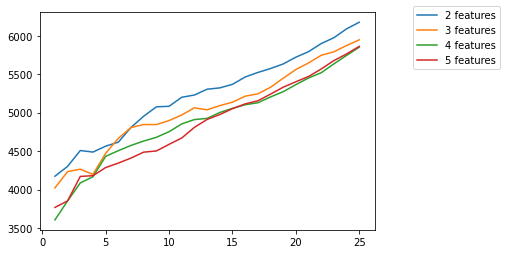

[(4021.073430927711, 3, 1), (4173.097769438022, 2, 1), (4197.038505225517, 3, 4), (4233.2821074205185, 3, 2), (4265.143071438043, 3, 3), (4301.518449120125, 2, 2), (4471.8678929293155, 3, 5), (4487.777515722098, 2, 4), (4508.051003991207, 2, 3), (4564.541252337995, 2, 5), (4616.987144139551, 2, 6), (4666.9158367683785, 3, 6), (4808.167136121154, 3, 7), (4808.71966802366, 2, 7), (4846.119756064141, 3, 9), (4846.455741292501, 3, 8), (4898.535960013321, 3, 10), (4955.096369331521, 2, 8), (4971.20757778864, 3, 11), (5038.248777081588, 3, 13), (5064.8172727952015, 3, 12), (5076.811419834249, 2, 9), (5084.25021018819, 2, 10), (5093.353268893057, 3, 14), (5137.494339202653, 3, 15), (5201.933931912419, 2, 11), (5215.8432556844655, 3, 16), (5230.9552622247775, 2, 12), (5246.207589008918, 3, 17), (5306.853036007737, 2, 13), (5323.956027459688, 2, 14), (5331.875140231621, 3, 18), (5370.266772333135, 2, 15), (5449.912313713443, 3, 19), (5465.589207001633, 2, 16), (5493.792999158877, 4, 1), (5493.7

In [6]:
# create multivariate models using combinations of the features with the lowest error in the univariate model

two_features = ['engine-size', 'width']
three_features = ['engine-size', 'width', 'curb-weight']
four_features = ['engine-size', 'width', 'curb-weight', 'city-mpg']
five_features = ['engine-size', 'width', 'curb-weight', 'city-mpg', 'num-of-cylinders']

two_feat_rmse_list = []
three_feat_rmse_list = []
four_feat_rmse_list = []
five_feat_rmse_list = []
rmse_tuple_list = []
k_list = range(1, 26)
for k in k_list:
    two_feat_rmse = knn_train_test(normalized_cars_df, two_features, 'price', k)
    two_feat_rmse_list.append(two_feat_rmse)
    rmse_tuple_list.append((two_feat_rmse, 2, k))
    three_feat_rmse = knn_train_test(normalized_cars_df, three_features, 'price', k)
    three_feat_rmse_list.append(three_feat_rmse)
    rmse_tuple_list.append((three_feat_rmse, 3, k))
    four_feat_rmse = knn_train_test(normalized_cars_df, four_features, 'price', k)
    four_feat_rmse_list.append(four_feat_rmse)
    rmse_tuple_list.append((k_rmse, 4, k))
    five_feat_rmse = knn_train_test(normalized_cars_df, five_features, 'price', k)
    five_feat_rmse_list.append(five_feat_rmse)
    rmse_tuple_list.append((k_rmse, 5, k))

# plot the rmses
plt.plot(k_list, two_feat_rmse_list, label='2 features')
plt.plot(k_list, three_feat_rmse_list, label='3 features')
plt.plot(k_list, four_feat_rmse_list, label='4 features')
plt.plot(k_list, five_feat_rmse_list, label='5 features')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# print the rmses from smallest to largest
print(sorted(rmse_tuple_list))


## Model using k-fold validation
A multivariate model using k = 1 and engine-size, width, curb-weight, and city-mpg as the predictors yields the lowest error. This means that to predict the price of a car, we should look at the car with the most similar of those four attributes, and our car's price should be the same as that car's price.

**Evaluating the quality of the model**

The average RMSE using this model is 2,244 using 10-fold validation, and the standard deviation of the RMSE is 785. The mean car price in the data is \\$13,242, and the median price is \\$10,295, meaning that our prediction would be off by about 25% for most cars. The fact that the standard deviation of the error is approximately 1/3 of the average error may indicate that this model isn't particularly reliable; the error changes by about 1/3 depending on which data is used to train the model. 

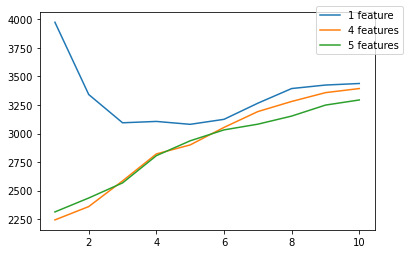

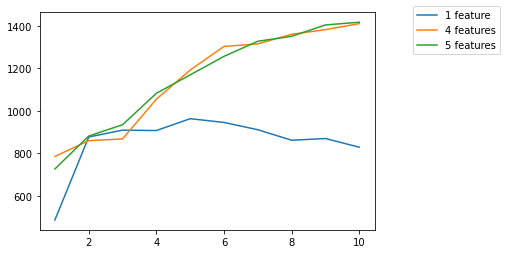

[3973.8279737834937, 3341.4368061772193, 3094.3702663497425, 3106.2560356678277, 3080.888847247148, 3124.6240800405158, 3265.6684761755423, 3393.887006706254, 3424.4813872767495, 3437.9704236706434]
[486.9991835473424, 876.9497263214347, 909.3043416557607, 907.368530198339, 963.0655023428444, 945.4818299678637, 911.1006955695626, 861.7172209899235, 869.7598041462696, 828.9936379081629]
[2244.745750115331, 2361.553069063014, 2585.9898848166968, 2822.079626122087, 2900.825126581375, 3053.9017469564155, 3192.3899666586826, 3280.877838228713, 3358.0548333119577, 3393.8025240608936]
[785.6889001796307, 859.7296700809396, 868.1435994079427, 1054.7942833596505, 1192.1299263898002, 1302.9563871444773, 1314.8248347427289, 1360.0810345858986, 1381.9218008577488, 1410.1045899932444]
[2314.647284227135, 2436.4846463764943, 2568.392491939543, 2806.7318703097717, 2936.7473272246143, 3032.226131836738, 3082.196178208226, 3153.0190119263543, 3249.1192028868695, 3294.003171683148]
[726.7376178142033, 8

In [7]:
k_list = range(1, 11)
avg_one_feat_rmse_list = []
avg_four_feat_rmse_list = []
avg_five_feat_rmse_list = []
std_one_feat_rmse_list = []
std_four_feat_rmse_list = []
std_five_feat_rmse_list = []
for k in k_list:
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)

    one_feat_mses = cross_val_score(knn, normalized_cars_df[['engine-size']], normalized_cars_df['price'], scoring='neg_mean_squared_error', cv=kf)
    one_feat_rmses = abs(one_feat_mses) ** 0.5
    avg_one_feat_rmse = np.mean(one_feat_rmses)
    avg_one_feat_rmse_list.append(avg_one_feat_rmse)
    std_one_feat_rmse = np.std(one_feat_rmses)
    std_one_feat_rmse_list.append(std_one_feat_rmse)

    four_feat_mses = cross_val_score(knn, normalized_cars_df[four_features], normalized_cars_df['price'], scoring='neg_mean_squared_error', cv=kf)
    four_feat_rmses = abs(four_feat_mses) ** 0.5
    avg_four_feat_rmse = np.mean(four_feat_rmses)
    avg_four_feat_rmse_list.append(avg_four_feat_rmse)
    std_four_feat_rmse = np.std(four_feat_rmses)
    std_four_feat_rmse_list.append(std_four_feat_rmse)
    
    five_feat_mses = cross_val_score(knn, normalized_cars_df[five_features], normalized_cars_df['price'], scoring='neg_mean_squared_error', cv=kf)
    five_feat_rmses = abs(five_feat_mses) ** 0.5
    avg_five_feat_rmse = np.mean(five_feat_rmses)
    avg_five_feat_rmse_list.append(avg_five_feat_rmse)
    std_five_feat_rmse = np.std(five_feat_rmses)
    std_five_feat_rmse_list.append(std_five_feat_rmse)
    
# plot the mean and standard errors
plt.plot(k_list, avg_one_feat_rmse_list, label='1 feature')
plt.plot(k_list, avg_four_feat_rmse_list, label='4 features')
plt.plot(k_list, avg_five_feat_rmse_list, label='5 features')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.plot(k_list, std_one_feat_rmse_list, label='1 feature')
plt.plot(k_list, std_four_feat_rmse_list, label='4 features')
plt.plot(k_list, std_five_feat_rmse_list, label='5 features')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# print rmse info
print(avg_one_feat_rmse_list)
print(std_one_feat_rmse_list)
print(avg_four_feat_rmse_list)
print(std_four_feat_rmse_list)
print(avg_five_feat_rmse_list)
print(std_five_feat_rmse_list)


In [8]:
# is the rmse small or large?

print(normalized_cars_df['price'].describe())
print(normalized_cars_df['price'].median())

count      199.000000
mean     13242.613065
std       7978.344857
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16501.500000
max      45400.000000
Name: price, dtype: float64
10295.0


In [10]:
# applying the model
# predict the price of a car with a engine-size = 130, width = 65.5, curb-weight = 2337, and city-mpg = 18. 

from scipy.spatial import distance

new_car = [[130, 65.5, 2337, 18]]

for i in range(len(cars_df)):
    cars_df.loc[i, 'dist'] = distance.euclidean(cars_df[['engine-size', 'width', 'curb-weight', 'city-mpg']].loc[i], new_car)
    
predicted_price = cars_df[cars_df['dist'] == cars_df['dist'].min()]['price'].iloc[0]
print(predicted_price)


8499
